 ## Nobel Prize 




 - Nobel Prize is an international scientific award. It is mostly given to people who had a big contribution in a any filed. The felds are chemistry, literature, physics, medicine, economics, and peace. 
590 Nobel prizes were won by 935 people and organizations. The first prize was given in year 1901 and it is still being awarded till today.

- The dataset used here is taken from https://www.datacamp.com/projects/441


- The webpage for this work : https://reemessam.github.io/Nobel-Prize/


- This dataset was investigated and analyzed to answer the follwing questions:

     - Is there a relation between the organization country and the category of the prize? 
     - Is a specific gender that wins the most prizes?
     - What is the birth country and organization country that has the highest number nobel prize winners ?
     - What is the category that has highest numbe of prizes?
     - What is the average age of the winners?
     - Is there anyone who was awarded the prize more than once?
    
    
- References: 
     - https://en.wikipedia.org/wiki/Nobel_Prize#cite_note-8
     - https://www.kaggle.com/nobelfoundation/nobel-laureates/kernels
     
     
      



## Data Cleaning 

> - #### The first step in the data cleaning phase is reading the data and dropping the duplicated records. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import xlrd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

data =pd.read_csv("data.csv") 
data= data.drop_duplicates(subset=['Full Name','Year','Laureate ID'])
data.head()


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Unnamed: 18
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany,NaN
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France,NaN


> - #### There were alot of missing data in the death date, death country, death city features so we fill it manualy through wikipidia.
> - #### The nobel prize winners who are still alive we filled the three features out with "alive" and "not found".
> - #### Then we replaced the death date of "alive" and "not found" people with  the analysis date.

In [2]:
data=data.replace({'Death Date':"alive"},value="11/26/2019",regex=True)
data=data.replace({'Death Date':"not found"},value="11/26/2019",regex=True)
data.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Unnamed: 18
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany,NaN
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France,NaN


> - #### We found out that the number of organiztions that won nobel prize is between 2% and 3% and they are not important for our analysis so they were dropped. 

In [3]:
data = data[data["Laureate Type"] != 'Organization']
data=data.reset_index(drop=True)
data.head()


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Unnamed: 18
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany,NaN
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France,NaN


> - #### We were interested in the age of nobel prize winners when they were awarded the prize so we combuted it using the birth date and the year columns and then they were dropped.
> - #### In the same way we computed nobel prize winners current age using the birth date and the death date columns and then they were dropped.
> - #### We also dropped unused columns ("Motivation","Prize","Laureate Type,"Laureate ID")




In [4]:
data['Birth Year']= data["Birth Date"].str.extract("(\d{4})", expand=False)  
data['Death Year']= data["Death Date"].str.extract("(\d{4})", expand=False)  
data["Age"]=-data['Birth Year'].astype('int')+data["Death Year"].astype('int')
data["Age_Win"]=-data['Birth Year'].astype('int')+data["Year"].astype('int')
data.drop(['Death City', 'Death Country',"Birth Date","Death Date","Birth Year","Death Year","Motivation","Prize","Laureate Type","Laureate ID"], axis = 1,inplace = True)
data.drop(['Unnamed: 18'], axis = 1,inplace = True)
data.head()


,Year,Category,Prize Share,Full Name,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age_Win
0,1901,Chemistry,1-Jan,Jacobus Henricus van 't Hoff,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,59,49
1,1901,Literature,1-Jan,Sully Prudhomme,Paris,France,Male,NaN,NaN,NaN,68,62
2,1901,Medicine,1-Jan,Emil Adolf von Behring,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,63,47
3,1901,Peace,2-Jan,Jean Henry Dunant,Geneva,Switzerland,Male,NaN,NaN,NaN,82,73
4,1901,Peace,2-Jan,Frédéric Passy,Paris,France,Male,NaN,NaN,NaN,90,79


> - #### After investigating the "Birth Country" column, it was found that some countries had both their historical names and theri current names.We were only interested in the current name. In this case the current name was between brackes "( )". So we used a regular expression to extract the name between the brackets.

>- #### After that the missing values in the  "Organization Country" columns were filled. The values used to fill the missing values are the following:
  - #####  First the records were grouped by the "Birth Country".
  -  ##### After that for each "Birth Country" value, The most repeated "Organization Country" value was chosen for filling the missing values.


In [5]:
data['Birth Country']= data['Birth Country'].str.replace(r'[^(]*\(|\)[^)]*', '')
d=data.groupby('Birth Country')["Organization Country"].apply(lambda x: st.mode(x)[0][0])
d=d[data['Birth Country']]
d_null=data['Organization Country'].isnull()
data.eq(0).any()
for i in range(0,data['Birth Country'].size):
    
    if(d_null[i]):
        if(d[i]==0):
            data.iat[i,9] =data['Birth Country'][i] 
        else:
            data.iat[i,9] =d[i]

data.to_csv("new_data.csv")
data.head()

,Year,Category,Prize Share,Full Name,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age_Win
0,1901,Chemistry,1-Jan,Jacobus Henricus van 't Hoff,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,59,49
1,1901,Literature,1-Jan,Sully Prudhomme,Paris,France,Male,NaN,NaN,France,68,62
2,1901,Medicine,1-Jan,Emil Adolf von Behring,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,63,47
3,1901,Peace,2-Jan,Jean Henry Dunant,Geneva,Switzerland,Male,NaN,NaN,Switzerland,82,73
4,1901,Peace,2-Jan,Frédéric Passy,Paris,France,Male,NaN,NaN,France,90,79


## Exploratory analysis and visualizations

 > ### Statistics of the data

In [83]:
data.describe()


,Year,Age,Age_Win
count,882.000000,882.000000,882.000000
mean,1969.047619,79.411565,59.434240
std,32.894873,10.911761,12.403301
min,1901.000000,22.000000,17.000000
25%,1946.000000,73.000000,50.000000
50%,1975.000000,80.000000,60.000000
75%,1997.000000,87.750000,69.000000
max,2016.000000,103.000000,90.000000


> ### Current age distribution

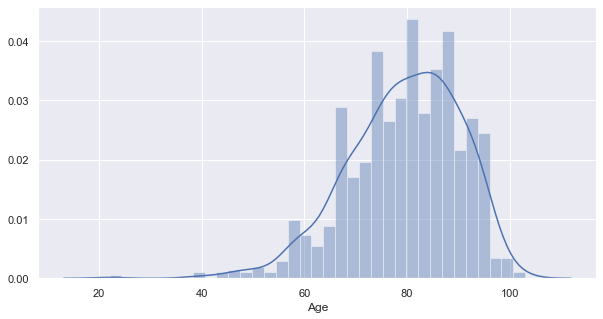

In [62]:
sns.distplot(data.Age, bins=35)
sns.set(rc={"figure.figsize": (10, 5)})

> ### The distribution of the age when the nobel prize was earned

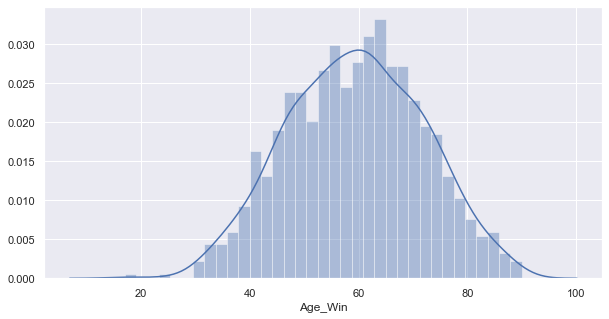

In [63]:
sns.distplot(data.Age_Win, bins=35)
sns.set(rc={"figure.figsize": (10, 5)})

> ### The distribution of the categories and their counts

Medicine      211
Physics       204
Chemistry     175
Literature    113
Peace         101
Economics      78
Name: Category, dtype: int64

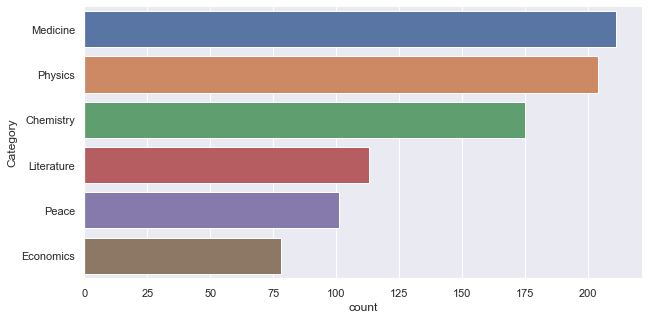

In [64]:
sns.countplot(y="Category", data=data,order=data.Category.value_counts().index,palette='deep')
sns.despine();
data['Category'].value_counts()

> ### Gender Distribution 

Male      834
Female     48
Name: Sex, dtype: int64

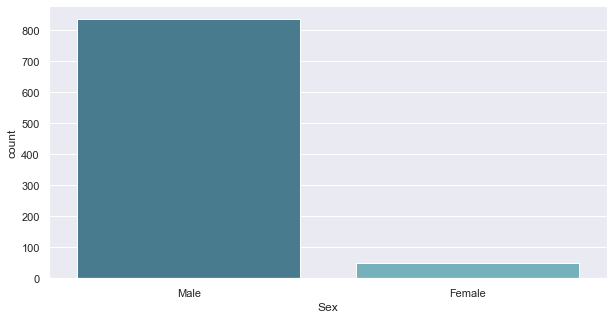

In [65]:
sns.countplot(x="Sex", data=data, palette='GnBu_d')
sns.despine();
data['Sex'].value_counts()

> ### Organization Country Counts

In [66]:
data['Organization Country'].value_counts()

United States of America               414
United Kingdom                         112
Germany                                 58
France                                  58
Sweden                                  32
Switzerland                             26
Federal Republic of Germany             23
Japan                                   19
Union of Soviet Socialist Republics     16
Denmark                                 13
Netherlands                             12
Belgium                                  9
Norway                                   9
Italy                                    7
Canada                                   7
Israel                                   6
Austria                                  6
Australia                                5
Northern Ireland                         5
Ireland                                  4
Russia                                   3
Iran                                     2
Guatemala                                2
Portugal   

> ### Organization Country Distribution 

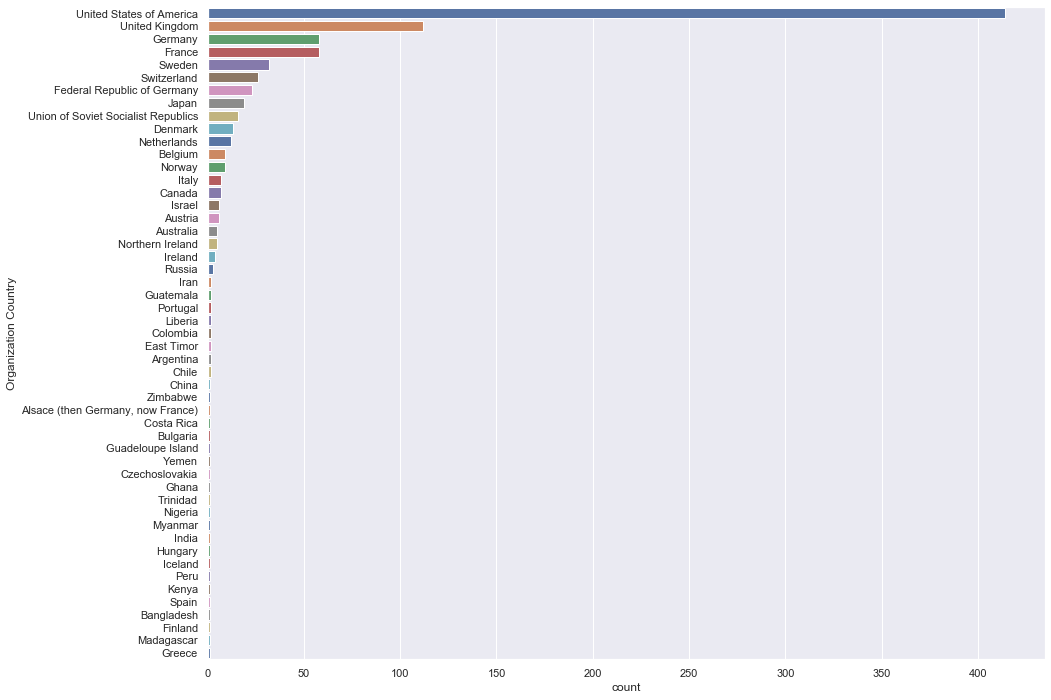

In [68]:
sns.countplot(y="Organization Country", data=data,order=data["Organization Country"].value_counts().index,palette='deep')
sns.set(rc={"figure.figsize": (15, 12)})

> ### Birth Country Distribution

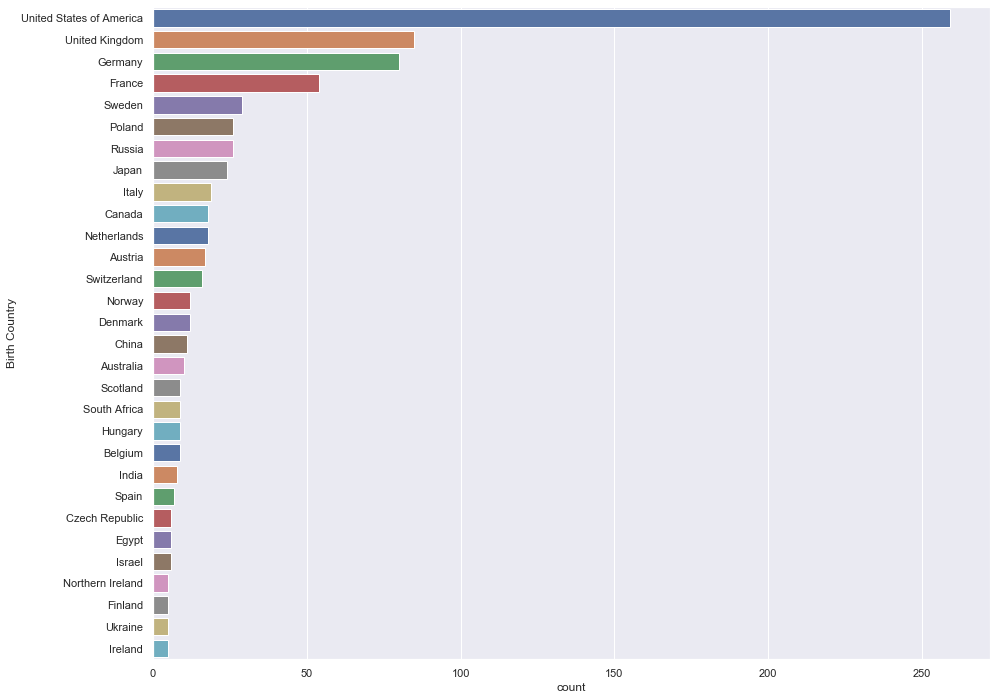

In [69]:
sns.countplot(y="Birth Country", data=data,order=data["Birth Country"].value_counts().head(30).index,palette='deep')
sns.set(rc={"figure.figsize": (15, 12)})

> ### Corelation analysis between the organization country and the category
   - #### In this part we are studying if there is a relaton between the organization country and the category by doing a chi-squre test.

In [70]:
contengency_table = pd.crosstab(data["Category"],data["Organization Country"], margins= False)
contengency_table

Organization Country,"Alsace (then Germany, now France)",Argentina,Australia,Austria,Bangladesh,Belgium,Bulgaria,Canada,Chile,China,...,Russia,Spain,Sweden,Switzerland,Trinidad,Union of Soviet Socialist Republics,United Kingdom,United States of America,Yemen,Zimbabwe
Category,,,,,,,,,,,,,,,,,,,,,
Chemistry,0,1,0,1,0,1,0,3,0,0,...,0,0,5,6,0,1,27,74,0,0
Economics,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,6,62,0,0
Literature,0,0,0,0,0,1,1,0,2,0,...,0,0,8,2,1,5,10,40,0,0
Medicine,0,1,4,4,0,3,0,2,0,1,...,1,1,7,8,0,0,31,106,0,0
Peace,0,0,0,0,1,3,0,0,0,0,...,0,0,6,3,0,2,13,33,1,1
Physics,1,0,1,1,0,1,0,2,0,0,...,2,0,4,7,0,7,25,99,0,0


>- #### From the above table it is shown that the USA is top country in all the categories followed by the UK 

In [71]:
st.chi2_contingency(contengency_table)

(402.6301361678153,
 3.0198785171582588e-09,
 250,
 array([[1.98412698e-01, 3.96825397e-01, 9.92063492e-01, 1.19047619e+00,
         1.98412698e-01, 1.78571429e+00, 1.98412698e-01, 1.38888889e+00,
         3.96825397e-01, 1.98412698e-01, 3.96825397e-01, 1.98412698e-01,
         1.98412698e-01, 2.57936508e+00, 3.96825397e-01, 4.56349206e+00,
         1.98412698e-01, 1.15079365e+01, 1.15079365e+01, 1.98412698e-01,
         1.98412698e-01, 1.98412698e-01, 3.96825397e-01, 1.98412698e-01,
         1.98412698e-01, 1.98412698e-01, 3.96825397e-01, 7.93650794e-01,
         1.19047619e+00, 1.38888889e+00, 3.76984127e+00, 1.98412698e-01,
         3.96825397e-01, 1.98412698e-01, 1.98412698e-01, 2.38095238e+00,
         1.98412698e-01, 9.92063492e-01, 1.78571429e+00, 1.98412698e-01,
         3.96825397e-01, 5.95238095e-01, 1.98412698e-01, 6.34920635e+00,
         5.15873016e+00, 1.98412698e-01, 3.17460317e+00, 2.22222222e+01,
         8.21428571e+01, 1.98412698e-01, 1.98412698e-01],
        [8.8435

> - #### p-value = 3.0198785171582588e-09 which is <0.05 the hypothesis is rejected.
> - #### So the attributes are corelated. In other word there is a relation between the organization country and the category 

>  ### USA - Prize Proportion per Decade

In [72]:
data['usa_born_winner'] = data['Birth Country']=="United States of America"
data['decade'] = (np.floor(data['Year']/10)*10).astype(int)
prop_usa_winners = data.groupby('decade',as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017857
1,1910,0.078947
2,1920,0.074074
3,1930,0.254545
4,1940,0.325000
5,1950,0.295775
6,1960,0.280000
7,1970,0.326733
8,1980,0.333333
9,1990,0.415842


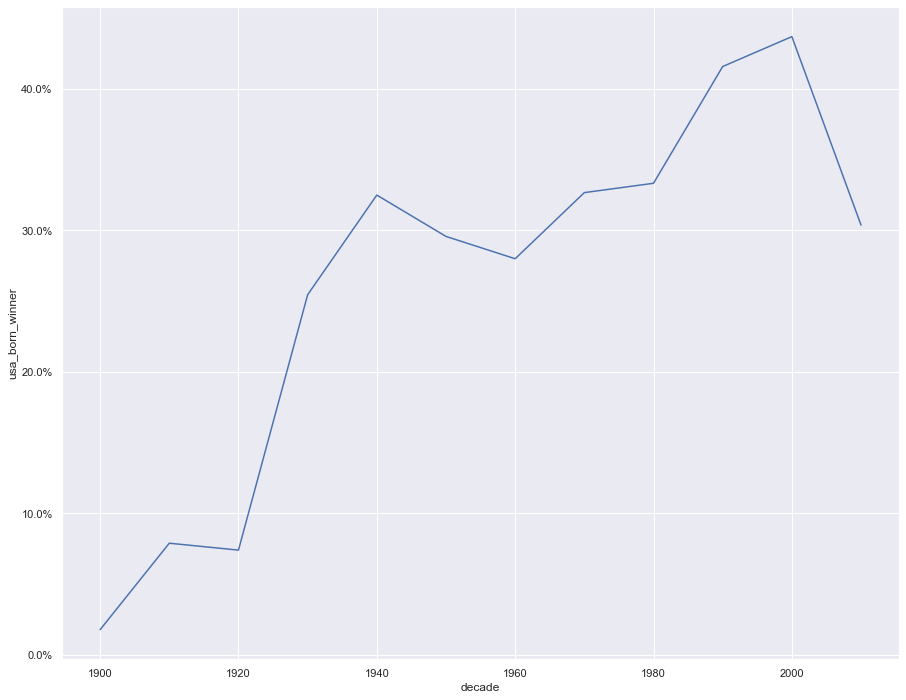

In [73]:
# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade',y='usa_born_winner')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

>  ### Male Winners per Decade

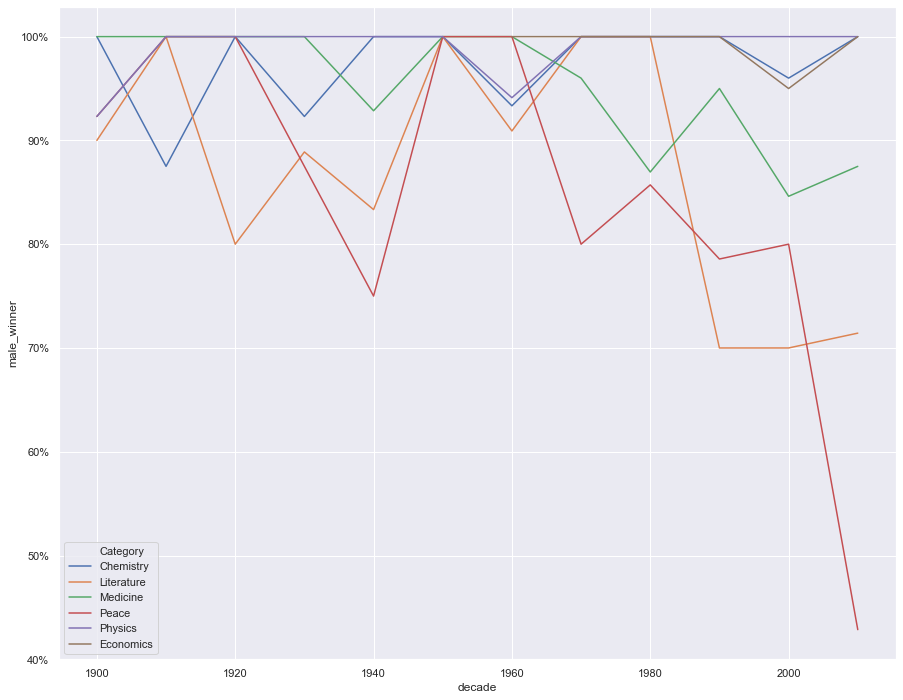

In [74]:
data['male_winner'] = np.where(data['Sex']=="Male", True, False)

prop_male_winners = data.groupby(['decade','Category'],as_index=False)['male_winner'].mean()


ax = sns.lineplot(x='decade', y='male_winner', hue='Category', data=prop_male_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))





> ### Female Prize winners by decade

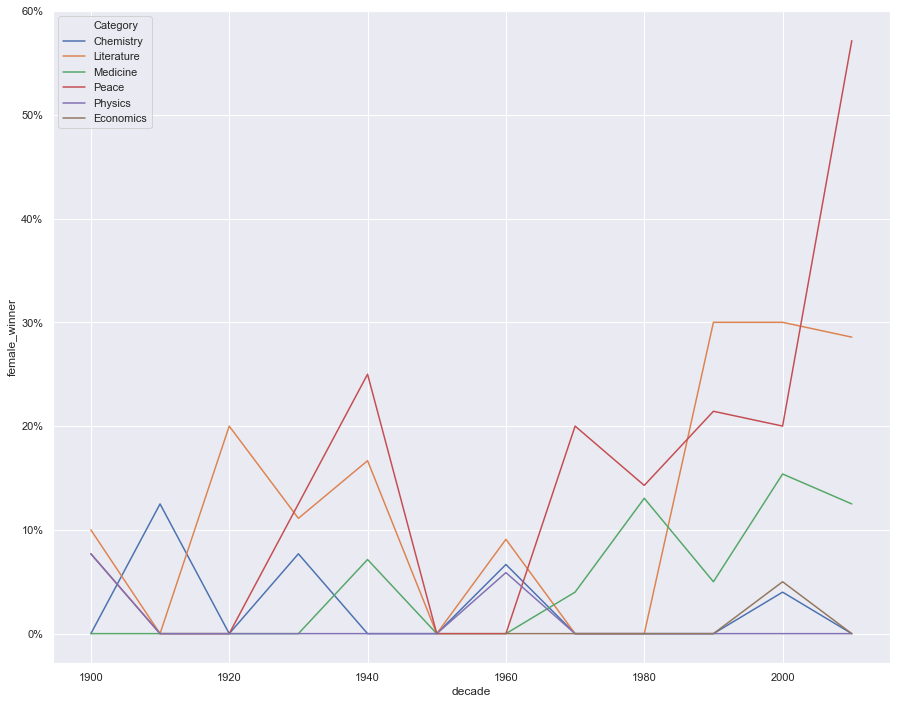

In [75]:
data['female_winner'] = np.where(data['Sex']=="Female", True, False)

prop_female_winners = data.groupby(['decade','Category'],as_index=False)['female_winner'].mean()


ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

> ### Nobel Category vs Age of Prize Winners for each Year

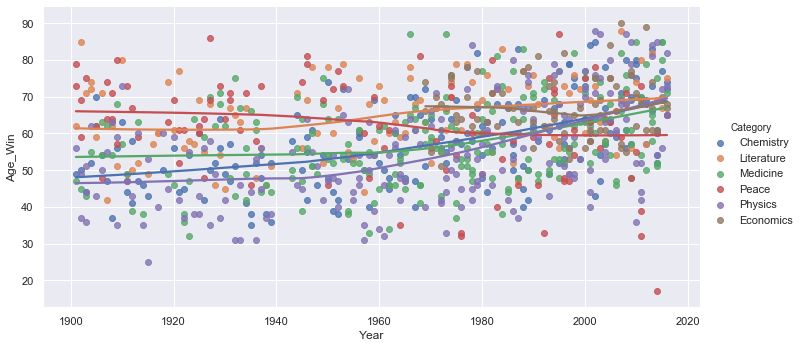

In [76]:
sns.lmplot('Year','Age_Win',data=data,lowess=True, aspect=2, hue='Category')

> ### People who won nobel prize more than once and the prize category of each time

In [77]:
count =data.groupby("Full Name").filter(lambda x: len(x) >= 2)['Full Name'].value_counts()
print(count)
temp=data.groupby("Full Name").filter(lambda x: len(x) >= 2)
pd.concat ([temp['Full Name'],temp["Category"]],axis=1).sort_values(by='Full Name')


Marie Curie, née Sklodowska    2
John Bardeen                   2
Linus Carl Pauling             2
Frederick Sanger               2
Name: Full Name, dtype: int64


,Full Name,Category
298,Frederick Sanger,Chemistry
490,Frederick Sanger,Chemistry
290,John Bardeen,Physics
412,John Bardeen,Physics
271,Linus Carl Pauling,Chemistry
332,Linus Carl Pauling,Peace
19,"Marie Curie, née Sklodowska",Physics
60,"Marie Curie, née Sklodowska",Chemistry


### Acording to the previous statistics:
> ##### The mean age for winning a nobel rize is 59 
> ##### Medicin is the top category in which nobel prize is won
> ##### USA is the top country from which nobel prize winners come from either born there or belong to an organization there
> ##### Nobel prize winners are mosly males 
